#### PREPROCESADO DE DATOS: Adding mood variables.

In [1]:
from comet_ml import Experiment

experiment = Experiment(api_key="ummagUWZ5eIZzmhPtFkA8oopu")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
[codecarbon INFO @ 09:58:23] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:23] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:23] No GPU found.
[codecarbon INFO @ 09:58:23] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:58:25] We saw that you have a Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:58:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz
[codecarbon INFO @ 09:58:25] >>> Tracker's metadata:
[codecarbon INFO @ 09:58:25]   Platform system: Linux-5.4.0-147-generic-x86_64-with-glibc2.29
[codecarbon INFO @ 09:58:25]   Python version: 3.8.10
[codecarbon INFO @ 09:58:25]   Available RAM : 31.360 GB
[codecarbon INFO @ 09:5

In [2]:
import vizx
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import csv
import numpy as np
import pandas as pd

import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-zm9qexp9 because the default path (/home/asadcor/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [4]:
tracks_features_extra = pd.read_csv('working/tracks_features_extra.csv')

In [5]:
tracks_features_extra

,artist_name,track_name,album_name,track_uri,album_release_date,track_popularity,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,John Mayer,Daughters,Heavier Things,5FPnjikbwlDMULCCCa6ZCJ,2003-09-09,68.0,0,0.674,0.413,2,-7.816,1,0.0274,0.8360,0.000019,0.0980,0.503,124.893,3,Anxious
1,Meghan Trainor,Like I'm Gonna Lose You,Title,2YlZnw2ikdb837oKMKjBkW,2015-01-09,79.0,0,0.630,0.530,0,-7.259,1,0.0434,0.4000,0.000000,0.1770,0.417,108.038,3,Anxious
2,Emily Hearn,Like Ships Need the Sea,Red Balloon,3OFxnRe7l8joTNJDtH3UMu,2012-01-31,33.0,0,0.456,0.636,1,-6.552,1,0.0432,0.4620,0.000189,0.2520,0.492,183.866,3,Sad
3,Ruth B.,Lost Boy,Safe Haven,0zMzyHAeMvwq5CRstru1Fp,2017-05-05,69.0,0,0.586,0.128,7,-9.297,1,0.0496,0.9630,0.000000,0.0858,0.371,123.498,4,Sad
4,Maroon 5,She Will Be Loved - Radio Mix,Songs About Jane: 10th Anniversary Edition,4llK75pXNWZz6KAho2Gp16,2002,81.0,0,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268225,Andy Rivera,Quédate,Quédate,6mN2iGsKPSo9noUeOof4ij,2016-05-13,0.0,0,0.881,0.783,6,-4.119,0,0.0406,0.0158,0.000029,0.1100,0.746,103.011,4,Energetic
268226,Tierra Cali,Juan Colorado,#Hashtag Y Lo Más Trending,5UlsV2g0fI7t1xxLSFXV6w,2015-08-28,29.0,0,0.599,0.832,7,-5.498,1,0.1510,0.3400,0.000079,0.0564,0.901,100.939,1,Sad
268227,Zaturno,Nadie Nos Para (feat. Sole & Ras Daniel),Universos,4T9xJeI5xd5JoUQdpsxOK0,2014-11-10,23.0,0,0.693,0.705,11,-4.286,1,0.2220,0.2950,0.000000,0.5760,0.940,91.057,4,Sad
268228,Banda Carnaval,Que Saben Del Querer,El Número 1,20f9PJWXOvUVGzNPBSVLRv,2011-01-01,25.0,0,0.690,0.556,2,-3.463,1,0.0368,0.3940,0.000000,0.0241,0.964,155.037,3,Energetic


[codecarbon INFO @ 09:58:43] Energy consumed for RAM : 0.000049 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 09:58:43] Energy consumed for all CPUs : 0.000177 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 09:58:43] 0.000226 kWh of electricity used since the begining.
[codecarbon INFO @ 09:58:58] Energy consumed for RAM : 0.000098 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 09:58:58] Energy consumed for all CPUs : 0.000354 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 09:58:58] 0.000452 kWh of electricity used since the begining.
[codecarbon INFO @ 09:59:13] Energy consumed for RAM : 0.000147 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 09:59:13] Energy consumed for all CPUs : 0.000531 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 09:59:13] 0.000678 kWh of electricity used since the begining.
[codecarbon INFO @ 09:59:28] Energy consumed for RAM : 0.000196 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 09:59:28] Energy consumed for all

## 0. Data cleaning and feature extraction

Data from: https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods

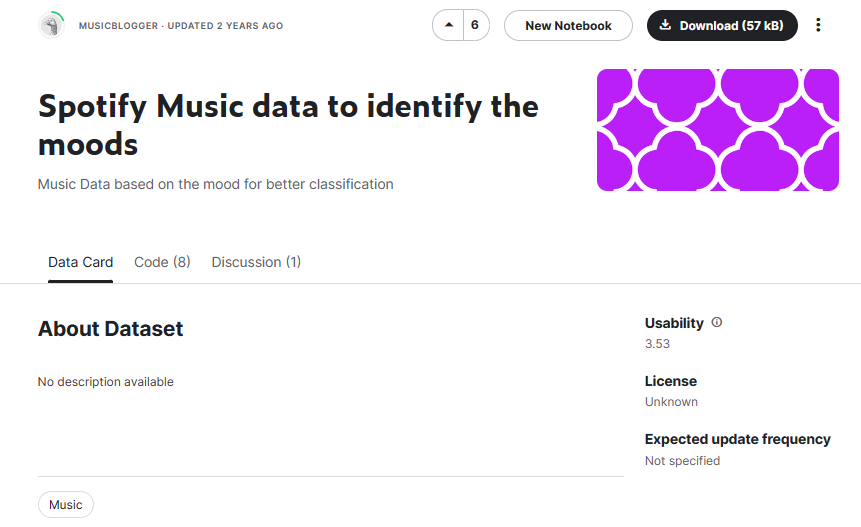


In [10]:
mood_data = pd.read_csv('mood_data/data_moods.csv')

We extract the track_uri. Use Spotify API to extract the same variables as the dataset.

In [16]:
mood_data_uri = mood_data['id'].tolist()

In [21]:
# Initialize Spotify API
client_credentials_manager = SpotifyClientCredentials(
    client_id='025ebb59059843218bf2b1dea2a7cb0d',client_secret='529f90285b9b41f2bb3460e9e1e973ac')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [22]:
#Fetching the spotify audio features, in chunks of 100 uri at a time.
start = 0
end = len(mood_data_uri)

# Initialize empty list to hold audio features
moodlist = []

with tqdm(total=end) as pbar:
    for i in range(start, end, 100):
        temp_list = mood_data_uri[i:i+100]
        try:
            playlists = sp.audio_features(temp_list)
            # Adding audio feature to itemlist
            moodlist.extend(playlists)
        except Exception as error:
            print('Error:', error)
            time.sleep(3)
            continue
        pbar.update(len(temp_list))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 686/686 [00:01<00:00, 541.84it/s]


In [24]:
# Create DataFrame
mood_data_features = pd.DataFrame(moodlist)

# Save as csv
mood_data_features.to_csv('working/mood_data_features.csv', index= False)

In [27]:
start = 0
end = len(mood_data_uri)

# Initialize empty list to hold audio features
mood_track_explicit = []

with tqdm(total=end) as pbar:
    for i in range(start, end, 50):
        temp_list = mood_data_uri[i:i+50]
        try:
            extra_features = sp.tracks(temp_list)['tracks']
            for x in range(len(extra_features)):
                if extra_features[x] is not None:
                    # Adding to the lists
                    mood_track_explicit.append(extra_features[x]['explicit'])
                else:
                    mood_track_explicit.append(None)
        except Exception as error:
            print('Error:', error)
            print(i)
            time.sleep(3)
            continue
        pbar.update(len(temp_list))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 686/686 [00:02<00:00, 247.30it/s]


We performed preprocessing on the mood dataset, including adding the audio features from Spotify API, and subsequently appended the mood variable to this processed dataset.

In [28]:
mood_data_ = {'track_explicit': mood_track_explicit, 'uri': mood_data_uri}
mood_data_e = pd.DataFrame(mood_data_)

In [34]:
mood_data_features = mood_data_features.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
mood_data_features_e = pd.merge(mood_data_features, mood_data_e, left_on='id', right_on='uri', how='left')
mood_data_features_e = mood_data_features_e.drop(['id'], axis=1)

In [40]:
mood_data_features_e['track_explicit'] = mood_data_features_e["track_explicit"].astype(int)
# Save as csv
mood_data_features_e.to_csv('working/mood_data_features_es.csv', index= False)

In [49]:
xy = mood_data.loc[:, ['id', 'mood']]
mood_data_features_e = pd.merge(mood_data_features_e, xy, left_on='uri', right_on='id', how='left')
mood_data_features_e = mood_data_features_e.drop(['uri', 'id'], axis=1)

In [56]:
# Save as csv
mood_data_features_e.to_csv('working/mood_data_features_es.csv', index= False)

In [10]:
mood_data_features_e = pd.read_csv('working/mood_data_features_es.csv')

In [11]:
mood_data_features_e = mood_data_features_e.drop(['duration_ms'], axis=1)

In [12]:
mood_data_features_e

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_explicit,mood
0,0.865,0.521,0,-6.932,1,0.0371,0.54800,0.000115,0.0989,0.7480,129.059,4,0,Happy
1,0.319,0.712,8,-9.742,1,0.0535,0.24200,0.000414,0.2940,0.7730,78.114,4,0,Happy
2,0.567,0.267,4,-6.502,1,0.0299,0.83900,0.000001,0.0890,0.0592,110.011,4,0,Sad
3,0.696,0.871,1,-6.482,1,0.0357,0.18600,0.028200,0.1730,0.8000,118.938,4,0,Sad
4,0.864,0.742,1,-6.117,1,0.0430,0.00875,0.394000,0.4100,0.6890,124.009,4,0,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.389,0.100,10,-22.464,0,0.0358,0.97200,0.934000,0.1130,0.0676,133.839,4,0,Calm
682,0.705,0.743,1,-6.631,1,0.0420,0.43200,0.013300,0.1030,0.3740,118.552,4,0,Happy
683,0.464,0.380,7,-8.052,1,0.0279,0.06650,0.898000,0.1140,0.0558,100.006,3,0,Calm
684,0.625,0.850,4,-3.904,1,0.0495,0.34600,0.000233,0.1740,0.6330,94.661,4,1,Happy


## 1. Using mood dataset to predict mood of the main dataset

In [21]:
x = mood_data_features_e.loc[:, 'danceability':'track_explicit']

# Mapping class label to respected integer
y = mood_data_features_e['mood'].map({'Happy': 0, 'Sad': 1, 'Energetic': 2, 'Calm':3})
target_names = ['Happy', 'Sad', 'Energetic', 'Calm']

In [22]:
# Splitting training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Models

In [25]:
RFC = RandomForestClassifier()  # Instantiate the RandomForestClassifier
RFC.fit(x_train, y_train) 
predictions = RFC.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for Random Forest Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for Random Forest Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for Random Forest Classifier: 0.797
Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

       Happy       0.56      0.78      0.65        23
         Sad       0.88      0.78      0.83        46
   Energetic       0.88      0.66      0.75        32
        Calm       0.85      0.95      0.90        37

    accuracy                           0.80       138
   macro avg       0.79      0.79      0.78       138
weighted avg       0.82      0.80      0.80       138



[codecarbon INFO @ 10:05:43] Energy consumed for RAM : 0.001420 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:05:43] Energy consumed for all CPUs : 0.005135 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:05:43] 0.006555 kWh of electricity used since the begining.
[codecarbon INFO @ 10:05:58] Energy consumed for RAM : 0.001469 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:05:58] Energy consumed for all CPUs : 0.005312 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:05:58] 0.006781 kWh of electricity used since the begining.


In [26]:
GBC = GradientBoostingClassifier() # Instantiate the Gradient Boosting Classifier
GBC.fit(x_train, y_train)
predictions = GBC.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for Gradient Boosting Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for Gradient Boosting Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

[codecarbon INFO @ 10:06:13] Energy consumed for RAM : 0.001518 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:06:13] Energy consumed for all CPUs : 0.005489 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:06:13] 0.007007 kWh of electricity used since the begining.


Accuracy for Gradient Boosting Classifier: 0.812
Classification Report for Gradient Boosting Classifier:

              precision    recall  f1-score   support

       Happy       0.69      0.73      0.71        30
         Sad       0.80      0.80      0.80        41
   Energetic       0.88      0.75      0.81        28
        Calm       0.88      0.92      0.90        39

    accuracy                           0.81       138
   macro avg       0.81      0.80      0.81       138
weighted avg       0.81      0.81      0.81       138



[codecarbon INFO @ 10:06:28] Energy consumed for RAM : 0.001567 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:06:28] Energy consumed for all CPUs : 0.005666 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:06:28] 0.007233 kWh of electricity used since the begining.
[codecarbon INFO @ 10:06:43] Energy consumed for RAM : 0.001616 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:06:43] Energy consumed for all CPUs : 0.005843 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:06:43] 0.007459 kWh of electricity used since the begining.


In [27]:
XGB = XGBClassifier() # Instantiate the XGBClassifier
XGB.fit(x_train, y_train)
predictions = XGB.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for XGB Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for XGB Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for XGB Classifier: 0.804
Classification Report for XGB Classifier:

              precision    recall  f1-score   support

       Happy       0.62      0.74      0.68        27
         Sad       0.85      0.78      0.81        45
   Energetic       0.83      0.74      0.78        27
        Calm       0.88      0.92      0.90        39

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.81      0.80      0.81       138



[codecarbon INFO @ 10:06:58] Energy consumed for RAM : 0.001665 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:06:58] Energy consumed for all CPUs : 0.006020 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:06:58] 0.007685 kWh of electricity used since the begining.
[codecarbon INFO @ 10:07:13] Energy consumed for RAM : 0.001714 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:07:13] Energy consumed for all CPUs : 0.006197 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:07:13] 0.007911 kWh of electricity used since the begining.


In [28]:
DTC = DecisionTreeClassifier() # Instantiate the DecisionTreeClassifier
DTC.fit(x_train, y_train)
predictions = DTC.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for Decision Tree Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for Decision Tree Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for Decision Tree Classifier: 0.725
Classification Report for Decision Tree Classifier:

              precision    recall  f1-score   support

       Happy       0.47      0.60      0.53        25
         Sad       0.78      0.73      0.75        44
   Energetic       0.71      0.57      0.63        30
        Calm       0.88      0.92      0.90        39

    accuracy                           0.72       138
   macro avg       0.71      0.70      0.70       138
weighted avg       0.74      0.72      0.73       138



[codecarbon INFO @ 10:07:28] Energy consumed for RAM : 0.001763 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:07:28] Energy consumed for all CPUs : 0.006374 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:07:28] 0.008137 kWh of electricity used since the begining.


In [29]:
LGBM = LGBMClassifier() # Instantiate the LGBMClassifier
LGBM.fit(x_train, y_train)
predictions = LGBM.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for LGBM Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for LGBM Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for LGBM Classifier: 0.790
Classification Report for LGBM Classifier:

              precision    recall  f1-score   support

       Happy       0.59      0.73      0.66        26
         Sad       0.80      0.79      0.80        42
   Energetic       0.88      0.68      0.76        31
        Calm       0.88      0.92      0.90        39

    accuracy                           0.79       138
   macro avg       0.79      0.78      0.78       138
weighted avg       0.80      0.79      0.79       138



[codecarbon INFO @ 10:07:43] Energy consumed for RAM : 0.001812 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:07:43] Energy consumed for all CPUs : 0.006551 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:07:43] 0.008363 kWh of electricity used since the begining.
[codecarbon INFO @ 10:07:58] Energy consumed for RAM : 0.001861 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:07:58] Energy consumed for all CPUs : 0.006728 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:07:58] 0.008589 kWh of electricity used since the begining.


In [32]:
SVC = SVC.fit(x_train, y_train)
predictions = SVC.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for Support Vector Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for Support Vector Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for Support Vector Classifier: 0.529
Classification Report for Support Vector Classifier:

              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00         0
         Sad       0.63      0.43      0.51        60
   Energetic       0.83      0.39      0.53        51
        Calm       0.66      1.00      0.79        27

    accuracy                           0.53       138
   macro avg       0.53      0.46      0.46       138
weighted avg       0.71      0.53      0.58       138



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[codecarbon INFO @ 10:08:28] Energy consumed for RAM : 0.001959 kWh. RAM Power : 11.7598729

In [33]:
KNC = KNeighborsClassifier() # Instantiate the KNeighborsClassifier
KNC.fit(x_train, y_train)
predictions = KNC.predict(x_test)
accuracy = accuracy_score(predictions, y_test)

print('Accuracy for KNN Classifier: {:3.3f}'.format(accuracy))
print('Classification Report for KNN Classifier:\n')
print(classification_report(predictions, y_test, target_names=target_names))

Accuracy for KNN Classifier: 0.638
Classification Report for KNN Classifier:

              precision    recall  f1-score   support

       Happy       0.28      0.35      0.31        26
         Sad       0.68      0.64      0.66        44
   Energetic       0.62      0.48      0.55        31
        Calm       0.88      0.97      0.92        37

    accuracy                           0.64       138
   macro avg       0.62      0.61      0.61       138
weighted avg       0.65      0.64      0.64       138



Best model:Gradient Boosting Classifier

### Predict mood labels for tracks in the Playlist Dataset

In [35]:
# tracks_features_extra = tracks_features_extra.drop(['duration_ms'], axis=1)
x_to_predict = tracks_features_extra.loc[:, 'track_explicit':'time_signature']
tracks_features_extra['track_explicit'].fillna(False, inplace=True)

tracks_features_extra['track_explicit'] = tracks_features_extra["track_explicit"].astype(int)
x_to_predict = tracks_features_extra.loc[:, 'track_explicit':'time_signature']

[codecarbon INFO @ 10:09:43] Energy consumed for RAM : 0.002204 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:09:43] Energy consumed for all CPUs : 0.007968 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:09:43] 0.010172 kWh of electricity used since the begining.


In [36]:
predict = GBC.predict(x_to_predict)
predict_proba = GBC.predict_proba(x_to_predict)

In [37]:
x_to_predict

,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0.674,0.413,2,-7.816,1,0.0274,0.8360,0.000019,0.0980,0.503,124.893,3
1,0,0.630,0.530,0,-7.259,1,0.0434,0.4000,0.000000,0.1770,0.417,108.038,3
2,0,0.456,0.636,1,-6.552,1,0.0432,0.4620,0.000189,0.2520,0.492,183.866,3
3,0,0.586,0.128,7,-9.297,1,0.0496,0.9630,0.000000,0.0858,0.371,123.498,4
4,0,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268225,0,0.881,0.783,6,-4.119,0,0.0406,0.0158,0.000029,0.1100,0.746,103.011,4
268226,0,0.599,0.832,7,-5.498,1,0.1510,0.3400,0.000079,0.0564,0.901,100.939,1
268227,0,0.693,0.705,11,-4.286,1,0.2220,0.2950,0.000000,0.5760,0.940,91.057,4
268228,0,0.690,0.556,2,-3.463,1,0.0368,0.3940,0.000000,0.0241,0.964,155.037,3


[codecarbon INFO @ 10:09:58] Energy consumed for RAM : 0.002253 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:09:58] Energy consumed for all CPUs : 0.008145 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:09:58] 0.010398 kWh of electricity used since the begining.


In [38]:
predict_proba

array([[8.42725353e-02, 4.54491764e-01, 3.95013660e-01, 6.62220411e-02],
       [1.23270005e-01, 5.70959586e-01, 3.04279260e-01, 1.49114954e-03],
       [5.29821939e-02, 7.63750572e-01, 1.77352339e-01, 5.91489496e-03],
       ...,
       [2.39698629e-01, 5.50317582e-01, 2.08279386e-01, 1.70440212e-03],
       [7.90587630e-02, 1.68135013e-01, 7.52104900e-01, 7.01324202e-04],
       [1.47854709e-01, 1.11803315e-01, 7.39085847e-01, 1.25613021e-03]])

In [39]:
predict

array([1, 1, 1, ..., 1, 2, 2])

In the following example, we illustrate the intended behavior for classifying songs into moods.

Example:

For the given array: [0.05877295, 0.33877918, 0.44563319, 0.15681468], the highest predicted probability is for the song to belong to group 3 (Energetic) with a probability of 44% (0.44563319). However, this probability is relatively low, indicating that the song may have been misclassified. In such cases where the highest probability is low, it is advisable to consider the second-highest probability. In this example, group 2 (Sad) has the second-highest probability, 33.8% of (0.33877918). Therefore, given that the song has nearly the same likelihood of belonging to either the Energetic or Sad group, we suggest classifying it as an Anxious song.

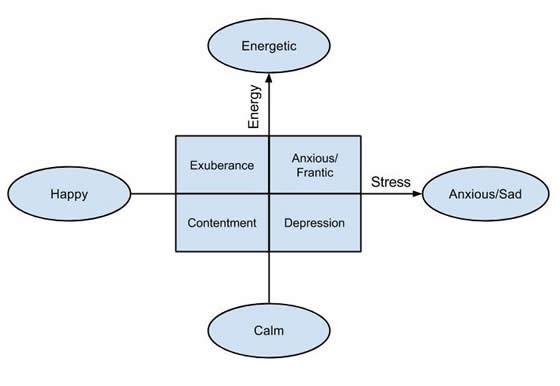

Thayer’s mood model. Source: Derived from Bhar (2014).

In [40]:
target_names = ['Happy', 'Sad', 'Energetic', 'Calm']

[codecarbon INFO @ 10:10:13] Energy consumed for RAM : 0.002302 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:10:13] Energy consumed for all CPUs : 0.008322 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:10:13] 0.010624 kWh of electricity used since the begining.


In [41]:
def get_moods(arr):
    """
    Analyzes an array of mood values and determines the corresponding moods based on certain criteria.

    Parameters:
        arr (numpy.ndarray): A 2-dimensional array of mood values.

    Returns:
        numpy.ndarray: An array of strings representing the determined moods.

    Notes:
        - The input array must have a shape of (n, 4), where n is the number of rows.
        - The mood values in each row of the array should range from 0 to 1.
        - The output array will have the same length as the number of valid moods found.

    """
    moods = []
    for row in arr:
        max_val = np.amax(row)
        if max_val >= 0.58:
            max_idx = np.argmax(row)
            if max_idx == 0:
                moods.append('Happy')
            elif max_idx == 1:
                moods.append('Sad')
            elif max_idx == 2:
                moods.append('Energetic')
            else:
                moods.append('Calm')
        else:
            sorted_indices = np.argsort(row)[::-1][:2]
            if 0 in sorted_indices and 2 in sorted_indices:
                moods.append('Exuberance')
            elif 1 in sorted_indices and 2 in sorted_indices:
                moods.append('Anxious')
            elif 1 in sorted_indices and 3 in sorted_indices:
                moods.append('Depression')
            elif 0 in sorted_indices and 3 in sorted_indices:
                moods.append('Contentment')
                
            # The following cases only represent the 1.4%
            elif 0 in sorted_indices and 1 in sorted_indices:
                sortindx = np.argsort(row)[::-1][[0, 2]]
                if 0 in sortindx and 2 in sortindx:
                    moods.append('Exuberance')
                if 0 in sortindx and 3 in sortindx:
                    moods.append('Contentment')
                if 1 in sortindx and 2 in sortindx:
                    moods.append('Anxious')
                if 1 in sortindx and 3 in sortindx:
                    moods.append('Depression')
            elif 2 in sorted_indices and 3 in sorted_indices:
                sortindxx = np.argsort(row)[::-1][[0, 2]]
                if 0 in sortindxx and 2 in sortindxx:
                    moods.append('Exuberance')
                if 0 in sortindxx and 3 in sortindxx:
                    moods.append('Contentment')
                if 1 in sortindxx and 2 in sortindxx:
                    moods.append('Anxious')
                if 1 in sortindxx and 3 in sortindxx:
                    moods.append('Depression')              
    return np.array(moods)

In [42]:
moods = get_moods(predict_proba)

In [43]:
tracks_features_extra

,artist_name,track_name,album_name,track_uri,album_release_date,track_popularity,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,John Mayer,Daughters,Heavier Things,5FPnjikbwlDMULCCCa6ZCJ,2003-09-09,68.0,0,0.674,0.413,2,-7.816,1,0.0274,0.8360,0.000019,0.0980,0.503,124.893,3,Anxious
1,Meghan Trainor,Like I'm Gonna Lose You,Title,2YlZnw2ikdb837oKMKjBkW,2015-01-09,79.0,0,0.630,0.530,0,-7.259,1,0.0434,0.4000,0.000000,0.1770,0.417,108.038,3,Anxious
2,Emily Hearn,Like Ships Need the Sea,Red Balloon,3OFxnRe7l8joTNJDtH3UMu,2012-01-31,33.0,0,0.456,0.636,1,-6.552,1,0.0432,0.4620,0.000189,0.2520,0.492,183.866,3,Sad
3,Ruth B.,Lost Boy,Safe Haven,0zMzyHAeMvwq5CRstru1Fp,2017-05-05,69.0,0,0.586,0.128,7,-9.297,1,0.0496,0.9630,0.000000,0.0858,0.371,123.498,4,Sad
4,Maroon 5,She Will Be Loved - Radio Mix,Songs About Jane: 10th Anniversary Edition,4llK75pXNWZz6KAho2Gp16,2002,81.0,0,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268225,Andy Rivera,Quédate,Quédate,6mN2iGsKPSo9noUeOof4ij,2016-05-13,0.0,0,0.881,0.783,6,-4.119,0,0.0406,0.0158,0.000029,0.1100,0.746,103.011,4,Energetic
268226,Tierra Cali,Juan Colorado,#Hashtag Y Lo Más Trending,5UlsV2g0fI7t1xxLSFXV6w,2015-08-28,29.0,0,0.599,0.832,7,-5.498,1,0.1510,0.3400,0.000079,0.0564,0.901,100.939,1,Sad
268227,Zaturno,Nadie Nos Para (feat. Sole & Ras Daniel),Universos,4T9xJeI5xd5JoUQdpsxOK0,2014-11-10,23.0,0,0.693,0.705,11,-4.286,1,0.2220,0.2950,0.000000,0.5760,0.940,91.057,4,Sad
268228,Banda Carnaval,Que Saben Del Querer,El Número 1,20f9PJWXOvUVGzNPBSVLRv,2011-01-01,25.0,0,0.690,0.556,2,-3.463,1,0.0368,0.3940,0.000000,0.0241,0.964,155.037,3,Energetic


In [44]:
tracks_features_extra['mood'] = get_moods(predict_proba)

In [45]:
tracks_features_extra

,artist_name,track_name,album_name,track_uri,album_release_date,track_popularity,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,John Mayer,Daughters,Heavier Things,5FPnjikbwlDMULCCCa6ZCJ,2003-09-09,68.0,0,0.674,0.413,2,-7.816,1,0.0274,0.8360,0.000019,0.0980,0.503,124.893,3,Anxious
1,Meghan Trainor,Like I'm Gonna Lose You,Title,2YlZnw2ikdb837oKMKjBkW,2015-01-09,79.0,0,0.630,0.530,0,-7.259,1,0.0434,0.4000,0.000000,0.1770,0.417,108.038,3,Anxious
2,Emily Hearn,Like Ships Need the Sea,Red Balloon,3OFxnRe7l8joTNJDtH3UMu,2012-01-31,33.0,0,0.456,0.636,1,-6.552,1,0.0432,0.4620,0.000189,0.2520,0.492,183.866,3,Sad
3,Ruth B.,Lost Boy,Safe Haven,0zMzyHAeMvwq5CRstru1Fp,2017-05-05,69.0,0,0.586,0.128,7,-9.297,1,0.0496,0.9630,0.000000,0.0858,0.371,123.498,4,Sad
4,Maroon 5,She Will Be Loved - Radio Mix,Songs About Jane: 10th Anniversary Edition,4llK75pXNWZz6KAho2Gp16,2002,81.0,0,0.651,0.663,0,-5.569,0,0.0281,0.2280,0.000000,0.0994,0.465,102.000,4,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268225,Andy Rivera,Quédate,Quédate,6mN2iGsKPSo9noUeOof4ij,2016-05-13,0.0,0,0.881,0.783,6,-4.119,0,0.0406,0.0158,0.000029,0.1100,0.746,103.011,4,Energetic
268226,Tierra Cali,Juan Colorado,#Hashtag Y Lo Más Trending,5UlsV2g0fI7t1xxLSFXV6w,2015-08-28,29.0,0,0.599,0.832,7,-5.498,1,0.1510,0.3400,0.000079,0.0564,0.901,100.939,1,Sad
268227,Zaturno,Nadie Nos Para (feat. Sole & Ras Daniel),Universos,4T9xJeI5xd5JoUQdpsxOK0,2014-11-10,23.0,0,0.693,0.705,11,-4.286,1,0.2220,0.2950,0.000000,0.5760,0.940,91.057,4,Anxious
268228,Banda Carnaval,Que Saben Del Querer,El Número 1,20f9PJWXOvUVGzNPBSVLRv,2011-01-01,25.0,0,0.690,0.556,2,-3.463,1,0.0368,0.3940,0.000000,0.0241,0.964,155.037,3,Energetic


[codecarbon INFO @ 10:10:28] Energy consumed for RAM : 0.002351 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:10:28] Energy consumed for all CPUs : 0.008499 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:10:28] 0.010850 kWh of electricity used since the begining.


In [181]:
# Save as csv
tracks_features_extra.to_csv('working/tracks_features_extra.csv', index= False)

In [46]:
tracks_features_extra = pd.read_csv('working/tracks_features_extra.csv')

In [52]:
mood_ = tracks_features_extra.loc[:, 'track_explicit':'mood']

meanMoods = mood_.groupby(['mood']).mean().rename_axis('name')
meanMoods['count'] = mood_.groupby(['mood']).size()
meanMoods = meanMoods.reset_index()

# meanMoods = mood_.groupby(['mood']).mean().rename_axis('name').reset_index()

In [48]:
meanMoods.transpose().round(3)

name,Anxious,Calm,Contentment,Depression,Energetic,Exuberance,Happy,Sad
track_explicit,0.114,0.000,0.000,0.001,0.094,0.057,0.039,0.144
danceability,0.632,0.537,0.763,0.373,0.744,0.704,0.711,0.526
energy,0.669,0.256,0.276,0.216,0.669,0.588,0.579,0.618
key,5.018,5.032,4.496,4.793,4.845,5.117,5.285,5.396
loudness,-7.470,-14.481,-14.061,-16.938,-7.271,-9.071,-10.211,-8.454
mode,0.889,0.968,0.997,0.980,0.984,0.824,0.676,0.540
speechiness,0.070,0.062,0.085,0.046,0.060,0.071,0.096,0.102
acousticness,0.211,0.884,0.883,0.891,0.182,0.409,0.477,0.307
instrumentalness,0.132,0.094,0.378,0.492,0.103,0.405,0.777,0.132
liveness,0.268,0.153,0.147,0.163,0.188,0.272,0.320,0.198


In [51]:
meanMoods.reset_index()

,name,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,count
0,Anxious,0.114429,0.631691,0.669134,5.017605,-7.470311,0.888644,0.070489,0.210851,0.132481,0.267948,0.526965,119.543470,3.947117,28629
1,Calm,0.000000,0.536854,0.256218,5.031847,-14.481217,0.968153,0.062199,0.884115,0.093510,0.153403,0.400955,107.761586,3.789809,157
2,Contentment,0.000000,0.762830,0.275734,4.496084,-14.060734,0.997389,0.085499,0.882728,0.378295,0.146887,0.617353,111.271204,3.898172,383
3,Depression,0.001056,0.373180,0.215666,4.793295,-16.938216,0.980201,0.046288,0.890810,0.491741,0.163489,0.255389,109.886576,3.722941,7576
4,Energetic,0.094050,0.744467,0.668928,4.844935,-7.270574,0.983921,0.059987,0.182450,0.102914,0.187779,0.632193,117.211115,3.958632,37565
5,Exuberance,0.057348,0.703822,0.588404,5.116786,-9.071197,0.823775,0.071206,0.408894,0.405343,0.271539,0.529610,119.764385,3.937873,3348
6,Happy,0.039014,0.710934,0.578739,5.285421,-10.210789,0.675565,0.095599,0.477127,0.777068,0.319910,0.503917,118.251593,3.940452,487
7,Sad,0.143609,0.525890,0.618032,5.396123,-8.453629,0.539837,0.102257,0.306775,0.132072,0.197734,0.440801,122.199184,3.894879,190085


[codecarbon INFO @ 10:11:13] Energy consumed for RAM : 0.002498 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:11:13] Energy consumed for all CPUs : 0.009030 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:11:13] 0.011528 kWh of electricity used since the begining.


#### Plooting mood: Radar chart

new instance of Viz class


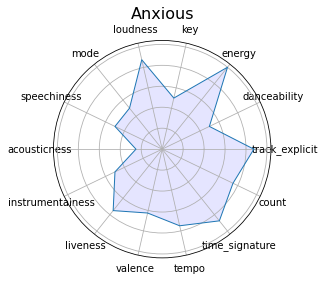

In [53]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 0, new_ax, 0, True).show()

new instance of Viz class


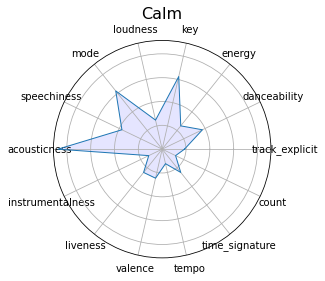

In [54]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 1, new_ax, 0, True).show()

new instance of Viz class


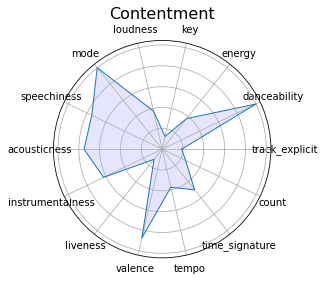

[codecarbon INFO @ 10:11:28] Energy consumed for RAM : 0.002547 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:11:28] Energy consumed for all CPUs : 0.009207 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:11:28] 0.011754 kWh of electricity used since the begining.


In [55]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 2, new_ax, 0, True).show()

new instance of Viz class


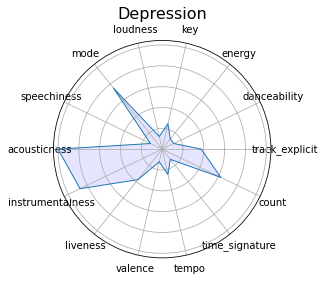

In [56]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 3, new_ax, 0, True).show()

new instance of Viz class


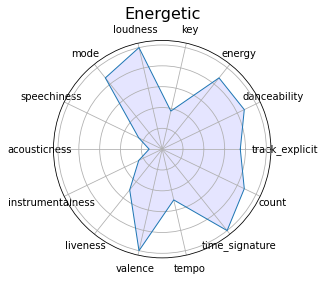

In [57]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 4, new_ax, 0, True).show()

new instance of Viz class


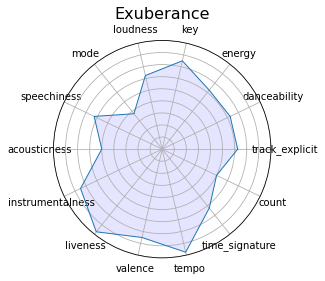

In [58]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 5, new_ax, 0, True).show()

new instance of Viz class


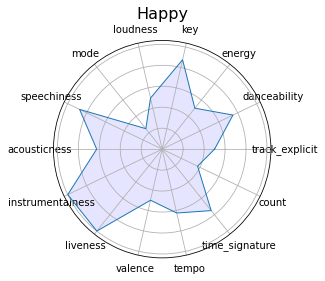

In [59]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 6, new_ax, 0, True).show()

new instance of Viz class


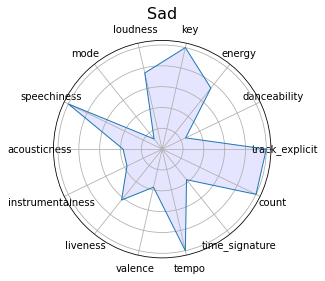

[codecarbon INFO @ 10:11:43] Energy consumed for RAM : 0.002596 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:11:43] Energy consumed for all CPUs : 0.009384 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:11:43] 0.011980 kWh of electricity used since the begining.


In [60]:
new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
viz = vizx.Viz()
viz.createSpider(meanMoods, 0, 7, new_ax, 0, True).show()

## 3. Adding mood to Playlist dataset

In [4]:
playlists_dataset = pd.read_csv('working/playlists_dataset.csv')

In [29]:
tracks_features_extra = pd.read_csv('working/tracks_features_extra.csv')

In [19]:
fe = tracks_features_extra.loc[:, ['track_uri', 'mood']]

In [23]:
playlists_dataset_with_mood = pd.merge(playlists_dataset, fe, left_on='track_uri', right_on='track_uri', how='left')

In [28]:
playlists_dataset_with_mood.to_csv('working/playlists_dataset_with_mood.csv', index= False)

In [26]:
print(playlists_dataset.shape)
print(playlists_dataset_with_mood.shape)

print(playlists_dataset_with_mood.columns)

(1330040, 29)
(1330040, 30)
Index(['pid', 'pos', 'name', 'description', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'artist_name', 'track_name',
       'album_name', 'track_uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
       'album_release_date', 'track_popularity', 'track_explicit', 'mood'],
      dtype='object')


In [27]:
playlists_dataset_with_mood[playlists_dataset_with_mood.notna().all(axis=1)].head(3)

,pid,pos,name,description,modified_at,num_tracks,num_albums,num_followers,num_edits,artist_name,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_release_date,track_popularity,track_explicit,mood
330,11007,0,the playlist,this playlist contains pretty much all my favo...,1508803200,169,150,2,131,Zedd,...,0.000000,0.0749,0.176,128.000,271427,4,2012-01-01,76.0,False,Sad
331,11007,1,the playlist,this playlist contains pretty much all my favo...,1508803200,169,150,2,131,OutKast,...,0.000532,0.1740,0.965,79.526,235213,4,2003,83.0,False,Sad
332,11007,2,the playlist,this playlist contains pretty much all my favo...,1508803200,169,150,2,131,Foster The People,...,0.115000,0.0956,0.965,127.975,239600,4,2011-05-23,84.0,False,Sad


In [61]:
experiment.end()

[codecarbon INFO @ 10:11:50] Energy consumed for RAM : 0.002620 kWh. RAM Power : 11.759872913360596 W
[codecarbon INFO @ 10:11:50] Energy consumed for all CPUs : 0.009471 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 10:11:50] 0.012091 kWh of electricity used since the begining.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sadcor/general/fd079872874d46afa885f31a8838eaa6
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     algorithm                : auto
COMET INFO:     begin_iteration          : 0
COMET INFO:     boosting_type            : gbdt
COMET INFO:     bootstrap                : True
COMET INFO:     break_ties               : F